In [1]:
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from PIL import Image
import os

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [4]:
X_train.shape
#So each image has been defined in 32*32 pixel in each pixel there are 3 channel for R,G,B value as red ,green,blue 
#can be used to define any color

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
resized_X_train = tf.image.resize(X_train, (24, 24))
resized_X_test = tf.image.resize(X_test, (24, 24))

In [10]:
#resized_X_train=tf.image.adjust_contrast(resized_X_train,1)
#resized_X_test=tf.image.adjust_contrast(resized_X_test,1)

In [11]:
#resized_X_train=tf.image.adjust_brightness(resized_X_train,2.855)
#resized_X_test=tf.image.adjust_brightness(resized_X_test,2.855)

In [12]:
resized_X_train.shape

TensorShape([50000, 24, 24, 3])

In [13]:
resized_X_train.shape

TensorShape([50000, 24, 24, 3])

In [14]:
resized_X_train[0]

<tf.Tensor: shape=(24, 24, 3), dtype=float32, numpy=
array([[[ 49.166664,  52.22222 ,  52.77778 ],
        [ 40.25    ,  39.833332,  36.666664],
        [ 61.75    ,  48.13889 ,  36.25    ],
        ...,
        [153.55556 , 124.38889 ,  97.083336],
        [149.33333 , 121.333336,  96.25    ],
        [144.13889 , 117.86111 ,  95.      ]],

       [[ 18.416666,  18.916666,  17.083332],
        [ 20.75    ,  10.5     ,   2.      ],
        [ 61.416676,  35.000004,  13.583335],
        ...,
        [129.66666 ,  93.499985,  57.916656],
        [120.      ,  84.75    ,  51.25    ],
        [116.166664,  80.58333 ,  49.583332]],

       [[ 32.11111 ,  23.666666,  15.277777],
        [ 57.500004,  33.66667 ,  12.750002],
        [ 98.58334 ,  58.944447,  26.333336],
        ...,
        [128.97221 ,  89.97222 ,  51.111107],
        [122.333336,  85.666664,  49.166668],
        [100.55554 ,  67.33332 ,  38.194435]],

       ...,

       [[215.16666 , 175.08333 ,  80.52779 ],
        [194.5 

In [15]:
train_images_resized_np = np.array(resized_X_train.numpy(), dtype=np.uint8)
test_images_resized_np = np.array(resized_X_test.numpy(), dtype=np.uint8)

In [16]:
train_images_resized_np.shape

(50000, 24, 24, 3)

In [17]:
train_images_resized_np[0]

array([[[ 49,  52,  52],
        [ 40,  39,  36],
        [ 61,  48,  36],
        ...,
        [153, 124,  97],
        [149, 121,  96],
        [144, 117,  95]],

       [[ 18,  18,  17],
        [ 20,  10,   2],
        [ 61,  35,  13],
        ...,
        [129,  93,  57],
        [120,  84,  51],
        [116,  80,  49]],

       [[ 32,  23,  15],
        [ 57,  33,  12],
        [ 98,  58,  26],
        ...,
        [128,  89,  51],
        [122,  85,  49],
        [100,  67,  38]],

       ...,

       [[215, 175,  80],
        [194, 150,  24],
        [177, 143,  27],
        ...,
        [176, 145,  90],
        [113,  85,  46],
        [ 39,  22,  10]],

       [[192, 151,  86],
        [189, 145,  33],
        [192, 154,  26],
        ...,
        [140, 106,  62],
        [124,  93,  51],
        [ 69,  43,  25]],

       [[176, 140, 108],
        [174, 135,  81],
        [187, 148,  62],
        ...,
        [171, 139, 102],
        [176, 143, 104],
        [120,  89,  67]]

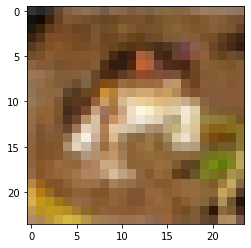

In [18]:
#Plotting the resized image 
plt.figure(figsize=(6,4))
plt.imshow(train_images_resized_np[0])

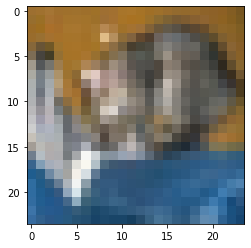

In [19]:
#Plotting the resized image 
plt.figure(figsize=(6,4))
plt.imshow(test_images_resized_np[0])

### The image resizing operation may cause some distortion or loss of information depending on the original image size and the target size. However, if the target size is not too different from the original size, the distortion should be minimal and the image should be still properly visible. In the case of resizing CIFAR-10 images from 32x32x3 to 24x24x3, the distortion should be minimal.
### That being said, if you want to avoid any distortion or loss of information, you may want to consider using padding to resize the images instead of directly resizing them. This will add padding around the images to make them fit the target size without changing their aspect ratio. Here is an example code that uses padding to resize CIFAR-10 images to 24x24x3:

#### Different kind of algorithm for interpolation methos
#### AREA	'area'
#### BICUBIC	'bicubic'
#### BILINEAR	'bilinear'
#### GAUSSIAN	'gaussian'
#### LANCZOS3	'lanczos3'
#### LANCZOS5	'lanczos5'
#### MITCHELLCUBIC	'mitchellcubic'
#### NEAREST_NEIGHBOR	'nearest'

# Here various kinds of interpolation can be applied but in this case it seems that the default interpolation is good  so that has been  taken 

In [20]:
#train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# add padding to resize images to 24x24x3

#Here the target size is 36 for width and height and the X_train width is 32 so target height and width >=current height+ offset
#here offset is 4
train_images_resized = tf.image.pad_to_bounding_box(X_train,4,4,36,36)
test_images_resized = tf.image.pad_to_bounding_box(X_test, 4,4,36,36)
'''
tf.image.resize(images,size,method=ResizeMethod.BILINEAR,preserve_aspect_ratio=False,antialias=False,name=None)
'''
'''
tf.image.resize() uses the bilinear interpolation algorithm, which computes each new pixel value as a weighted average
of the four nearest original pixels. Other interpolation algorithms available in TensorFlow include
nearest neighbor, bicubic, and Lanczos.
'''
train_images_resized1 = tf.image.resize(train_images_resized, (24, 24),antialias=True,method=tf.image.ResizeMethod.MITCHELLCUBIC,
                                            preserve_aspect_ratio=True)
test_images_resized1 = tf.image.resize(test_images_resized, (24, 24),antialias=True,method=tf.image.ResizeMethod.MITCHELLCUBIC,
                                       preserve_aspect_ratio=True)
#27-4+1=24 so 24*24 image is found
train_images_resized1 = train_images_resized1[:, 4:28, 4:28, :]
test_images_resized1 = test_images_resized1[:, 4:28, 4:28, :]

# convert resized images to NumPy arrays with dtype uint8
train_images_resized_np1 = np.array(train_images_resized1.numpy(), dtype=np.uint8)
test_images_resized_np1 = np.array(test_images_resized1.numpy(), dtype=np.uint8)


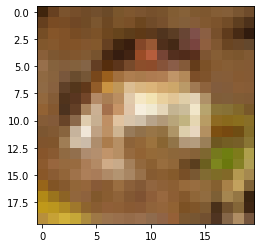

In [21]:
plt.figure(figsize=(6,4))
plt.imshow(train_images_resized_np1[0])

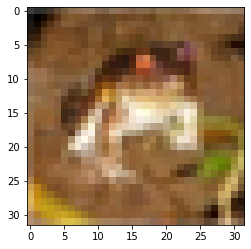

In [22]:
#plotting the old image
plt.figure(figsize=(6,4))
plt.imshow(X_train[0])

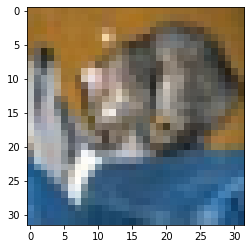

In [23]:
#plotting the old image
plt.figure(figsize=(6,4))
plt.imshow(X_test[0])

## Here pickle file is dumped 

In [24]:
with open('X_train.pkl','wb') as pickle_file: 
    pickle.dump(train_images_resized_np,pickle_file)

In [25]:
with open('X_test.pkl','wb') as pickle_file: 
    pickle.dump(test_images_resized_np,pickle_file)

In [26]:
with open('y_train.pkl','wb') as pickle_file: 
    pickle.dump(y_train,pickle_file)

In [27]:
with open('y_test.pkl','wb') as pickle_file: 
    pickle.dump(y_test,pickle_file)

In [28]:
global_model = tf.keras.models.Sequential()
global_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
global_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
global_model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
global_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
global_model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
global_model.add(tf.keras.layers.Flatten())
global_model.add(tf.keras.layers.Dense(512, activation='relu'))
global_model.add(tf.keras.layers.Dense(256, activation='relu'))
global_model.add(tf.keras.layers.Dense(128, activation='relu'))
global_model.add(tf.keras.layers.Dense(64, activation='relu'))
global_model.add(tf.keras.layers.Dense(10, activation='softmax'))
global_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
# Print the model summary
global_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [29]:
global_model = models.Sequential()
global_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(24,24,3)))
global_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
global_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
global_model.add(tf.keras.layers.Flatten())
global_model.add(tf.keras.layers.Dense(180, activation='relu'))
global_model.add(tf.keras.layers.Dense(90, activation='relu'))
global_model.add(tf.keras.layers.Dense(10, activation='softmax'))
global_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 22, 22, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 flatten_1 (Flatten)         (None, 5184)              0         
                                                                 
 dense_5 (Dense)             (None, 180)               933300    
                                                                 
 dense_6 (Dense)             (None, 90)                16290     
                                                      